In [1]:
import numpy as np
import matplotlib.pylab as plt
from glob import glob
import librosa
from scipy.stats import ttest_ind
import librosa.display
import seaborn as sns

In [19]:
# Load an audio file
audio_files_east_coast = glob('./east_coast/*.mp3')
audio_files_west_coast = glob('./west_coast/*.mp3')

NUMBER_OF_MFCCs = 20
SAMPLING_RATE = 22050
HOPLENGTH = 512
DCT_NORMALIZATION = None

In [26]:
# Utility functions

def compute_mfccs(audio_path, n_mfcc=20, compute_avg=True):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=SAMPLING_RATE)
    
    # Compute MFCCs
    return librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=HOPLENGTH, norm=DCT_NORMALIZATION)

def plot_mfcc_distributions(mfccs_list_1, mfccs_list_2, legend, title):
    plt.figure(figsize=(16, 8))
    sns.histplot(mfccs_list_1, bins=20, kde=True, color='red', alpha=0.5)
    sns.histplot(mfccs_list_2, bins=20, kde=True, color='yellow', alpha=0.5)
    plt.xlabel('MFCC Values')
    plt.ylabel('Frequency')
    plt.legend(labels=legend)
    plt.title(title)
    plt.show()

In [27]:
# ------------EAST-----------------
# List to store aggregated MFCCs and labels
avg_mfccs_list_east_coast = []
for file in audio_files_east_coast:
    avg_mfccs = compute_mfccs(file, NUMBER_OF_MFCCs).reshape(1, NUMBER_OF_MFCCs)
    avg_mfccs_list_east_coast.append(avg_mfccs)

east_coast_mfccs = np.vstack(avg_mfccs_list_east_coast)

# -------------WEST----------------
# List to store aggregated MFCCs and labels
avg_mfccs_list_west_coast = []
for file in audio_files_west_coast:
    mfccs = compute_mfccs(file, NUMBER_OF_MFCCs).reshape(1, NUMBER_OF_MFCCs)
    avg_mfccs_list_west_coast.append(mfccs)

west_coast_mfccs = np.vstack(avg_mfccs_list_west_coast)

<h2>Statistical Testing</h2>

In [28]:
ttest_results = []
for i in range(NUMBER_OF_MFCCs):
    east = east_coast_mfccs[:, i]
    west = west_coast_mfccs[:, i]
    test_result = ttest_ind(east, west)
    ttest_results.append({
        'MFCC': i + 1,
        'P-Value': test_result.pvalue
    })

for test in ttest_results:
    if test['P-Value'] < 0.05:
        print(f'''At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. {test['MFCC']}''')

At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 1
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 2
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 3
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 5
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 7
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 13
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 14
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 15
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 16
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 17
At a 0.05 threshold there is a significant difference between the mfccs at MFCC no. 18
At a 0.05 threshold there is a significant diffe

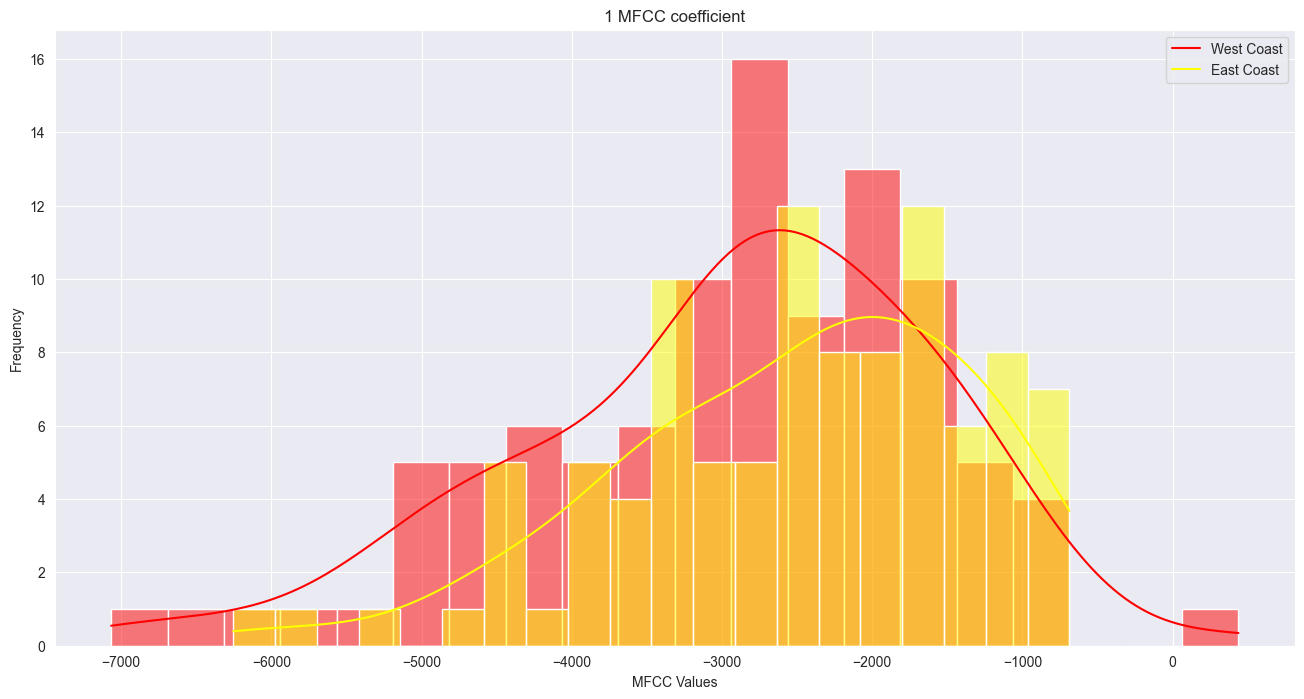

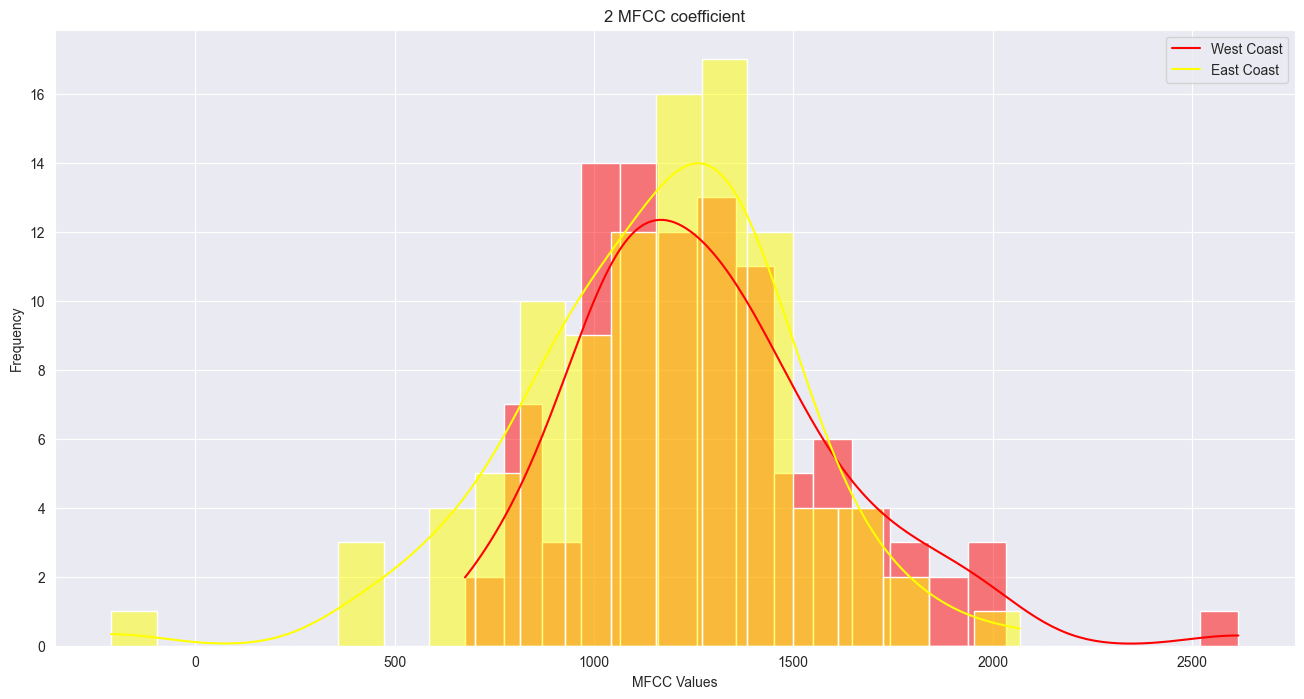

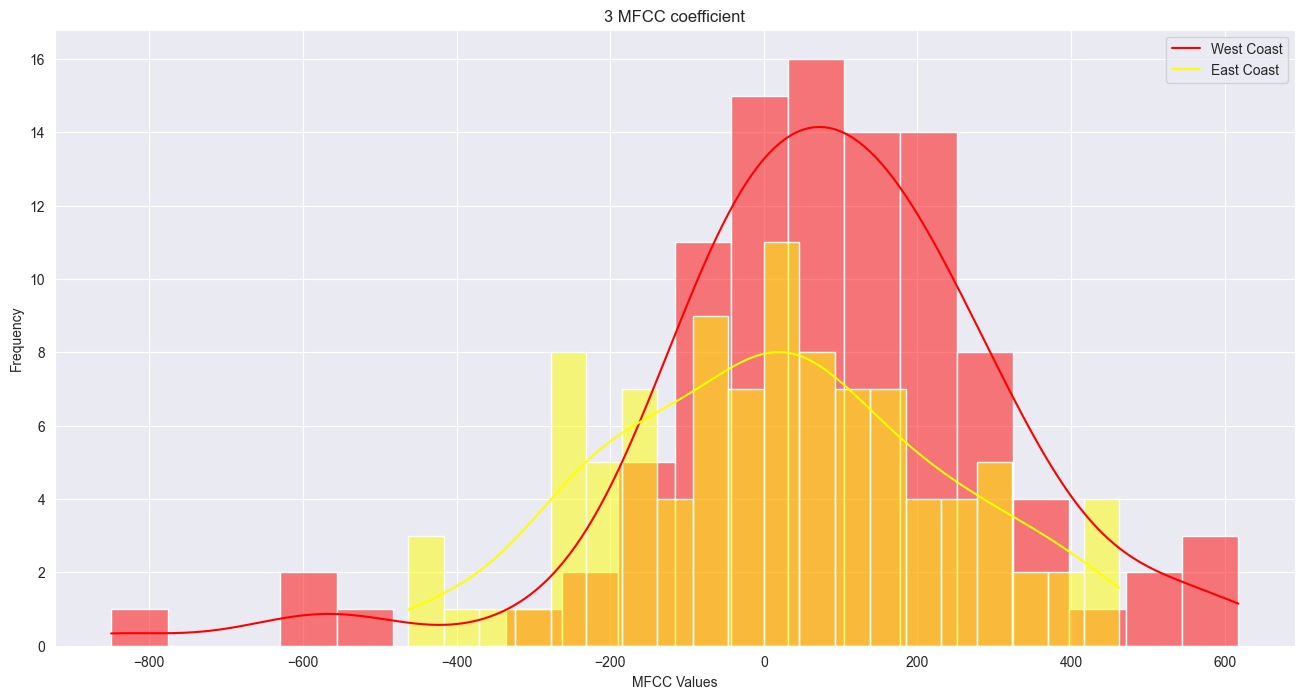

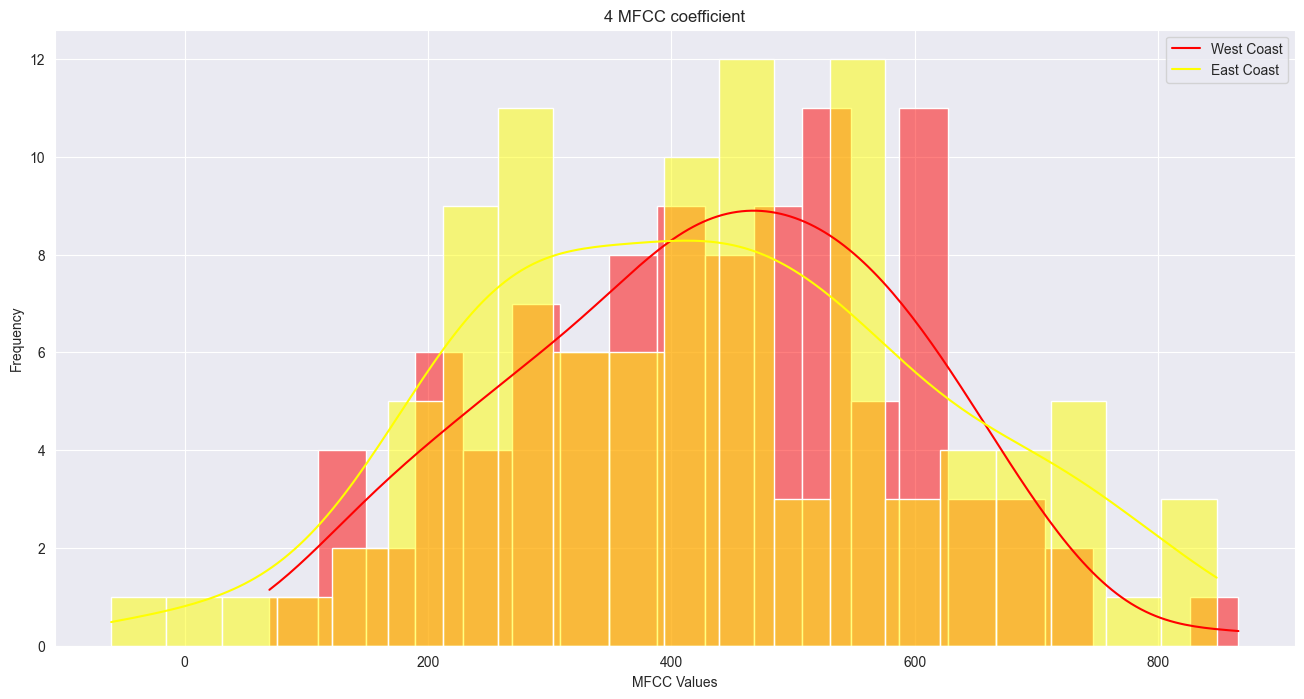

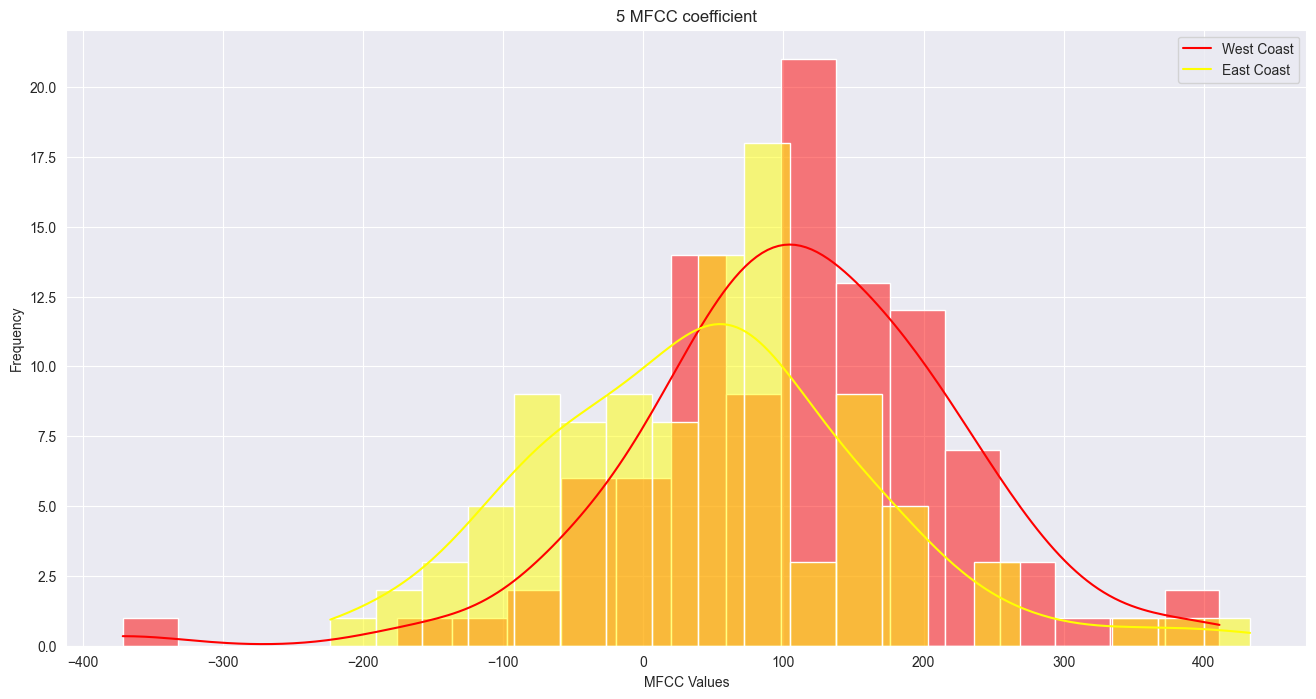

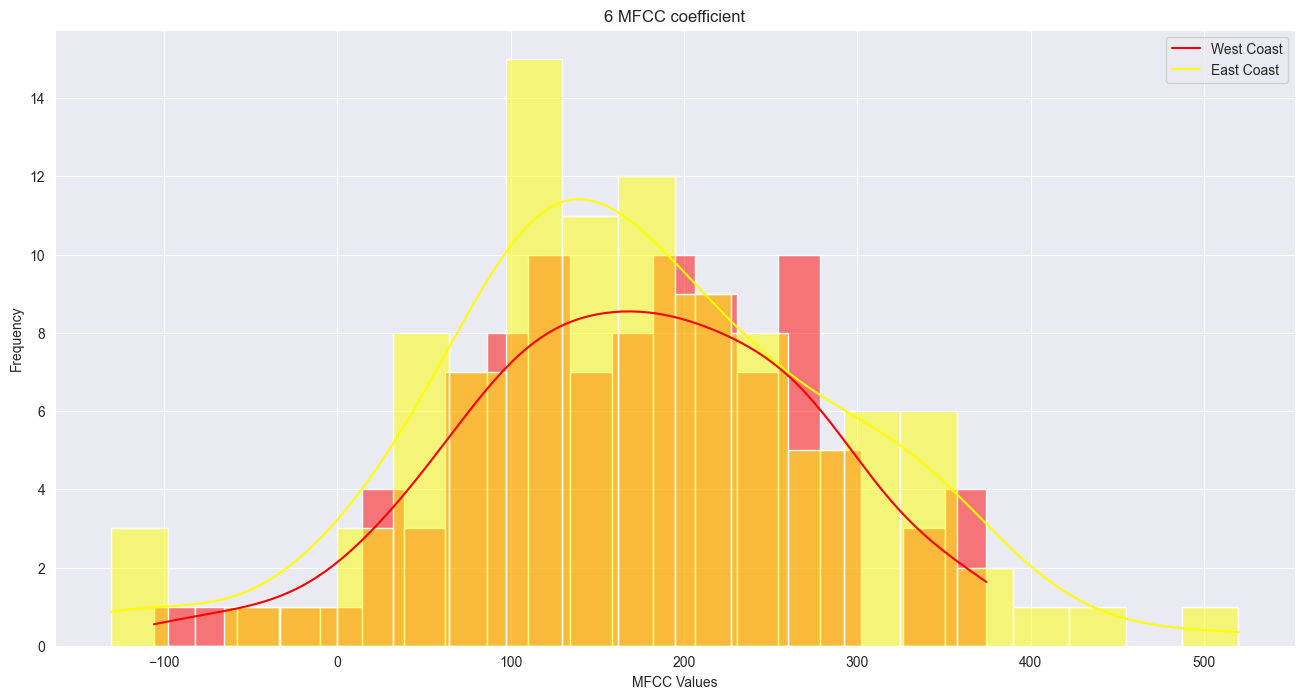

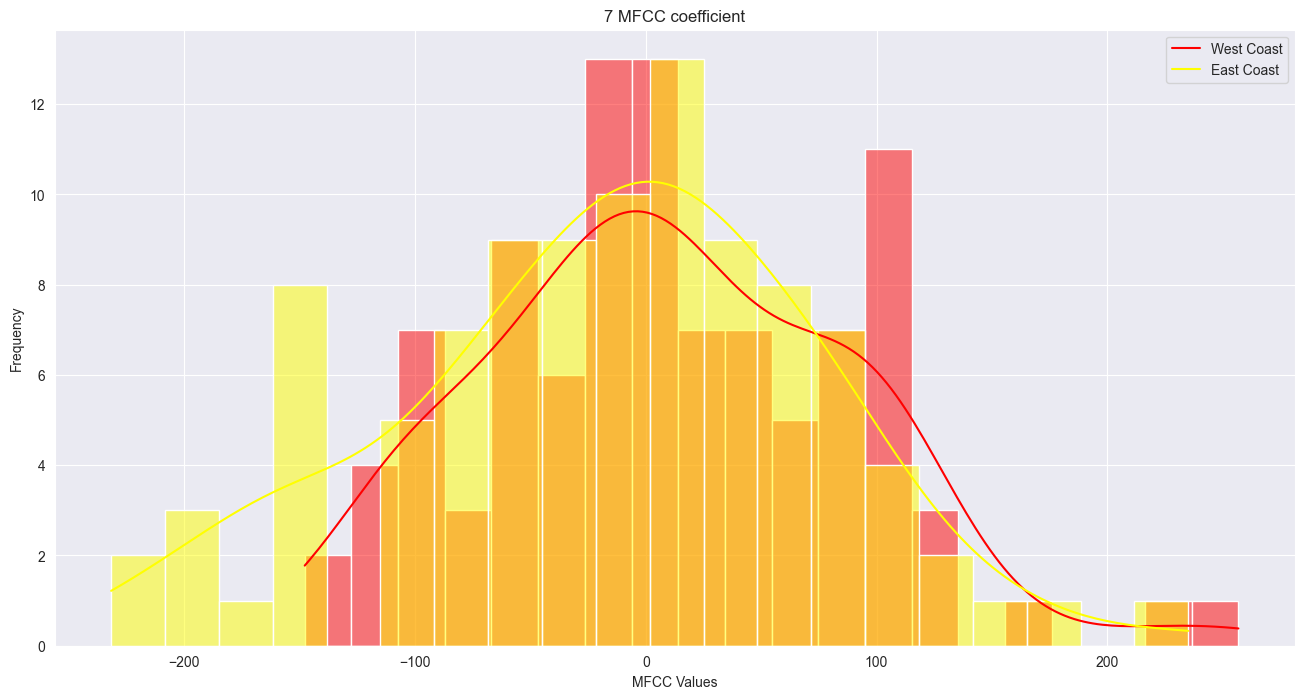

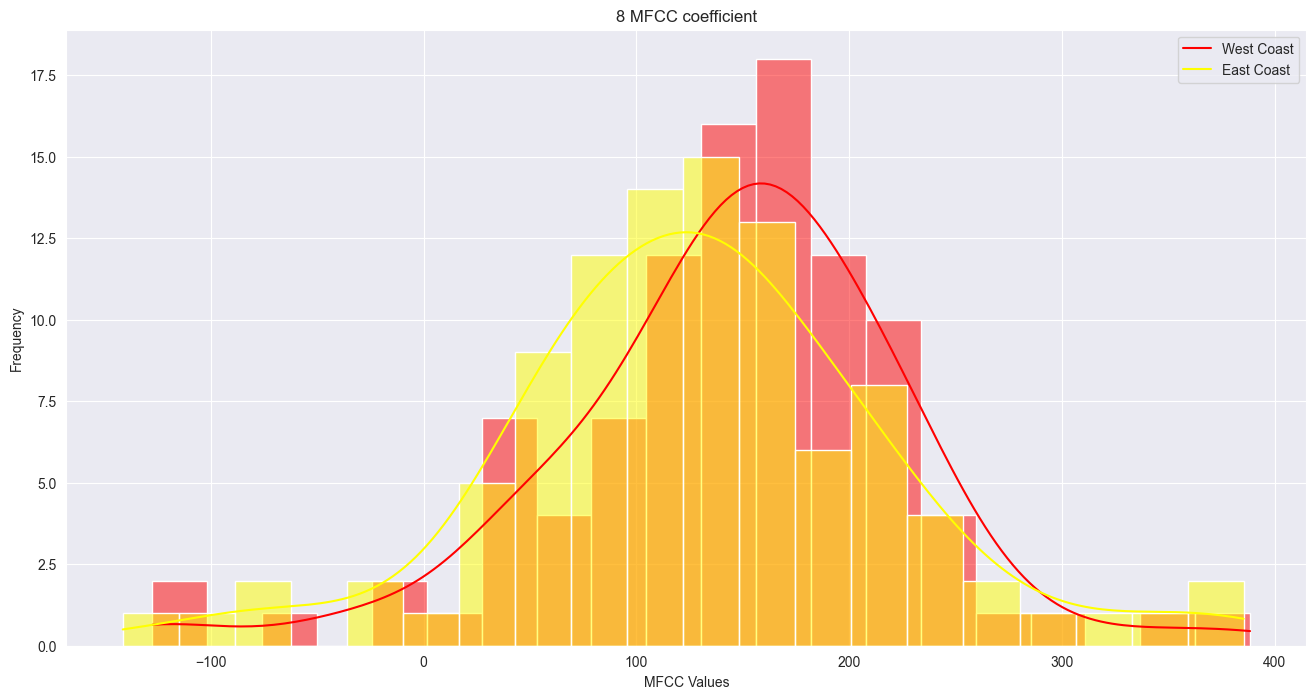

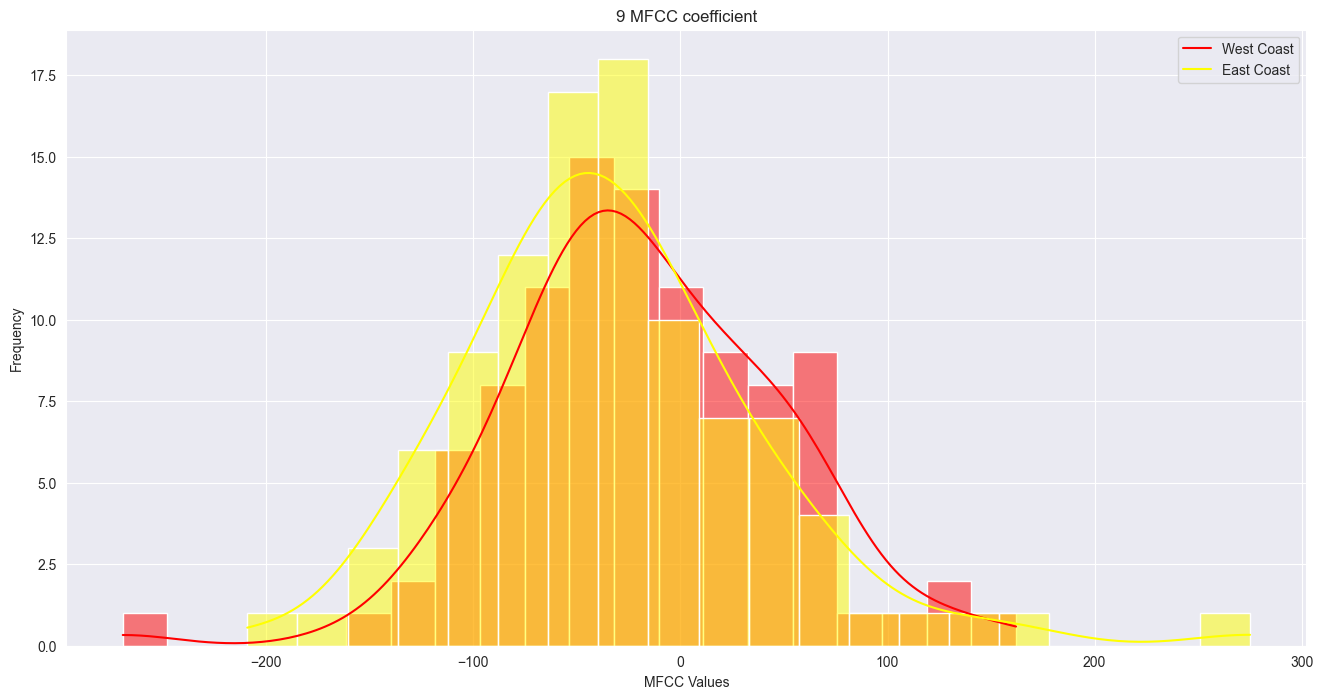

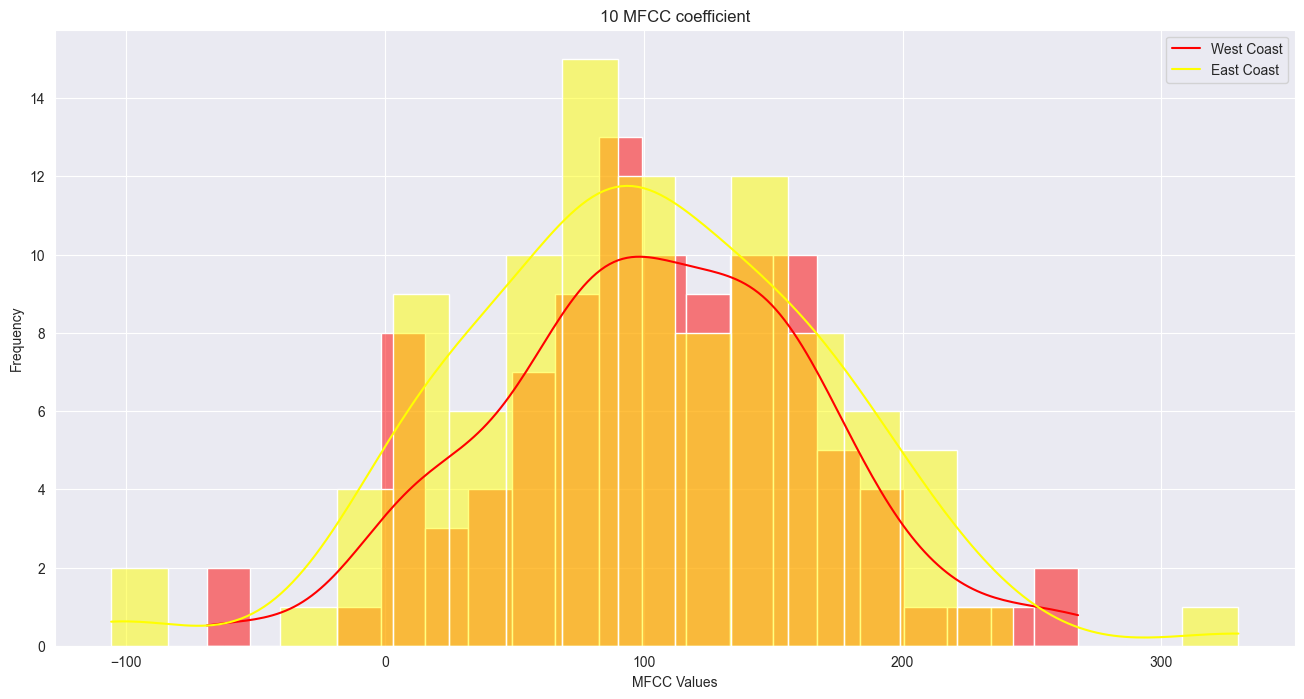

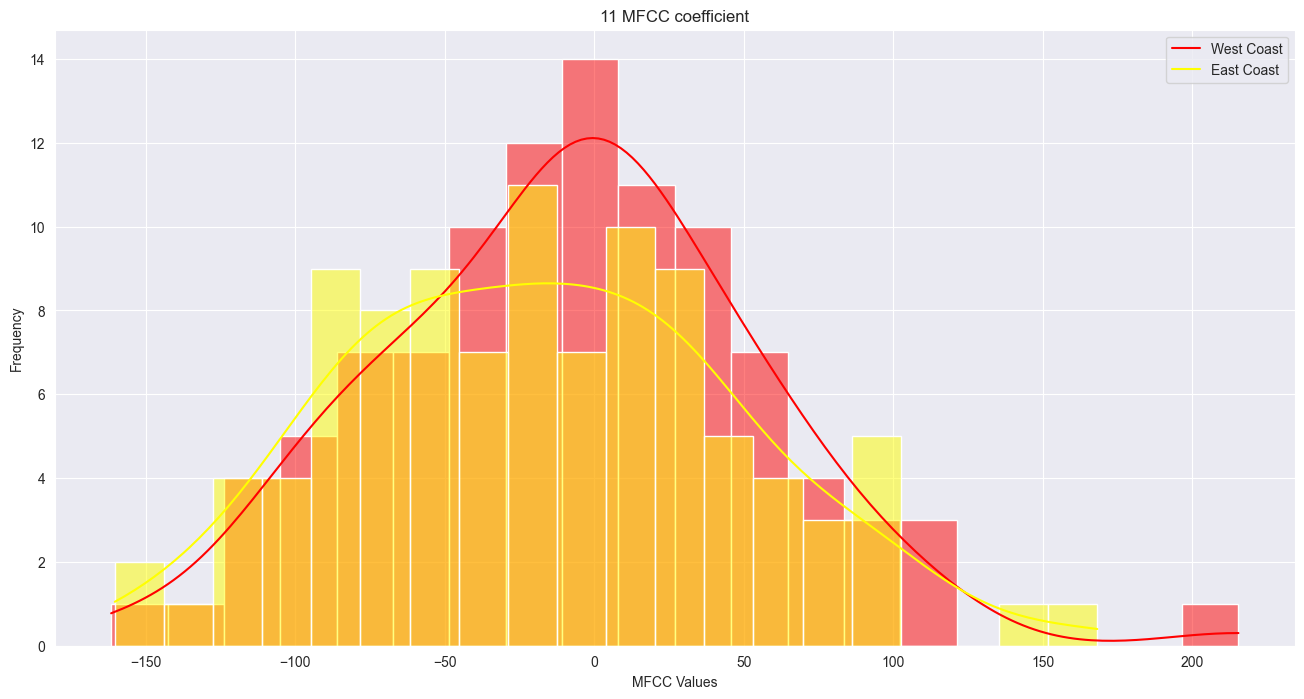

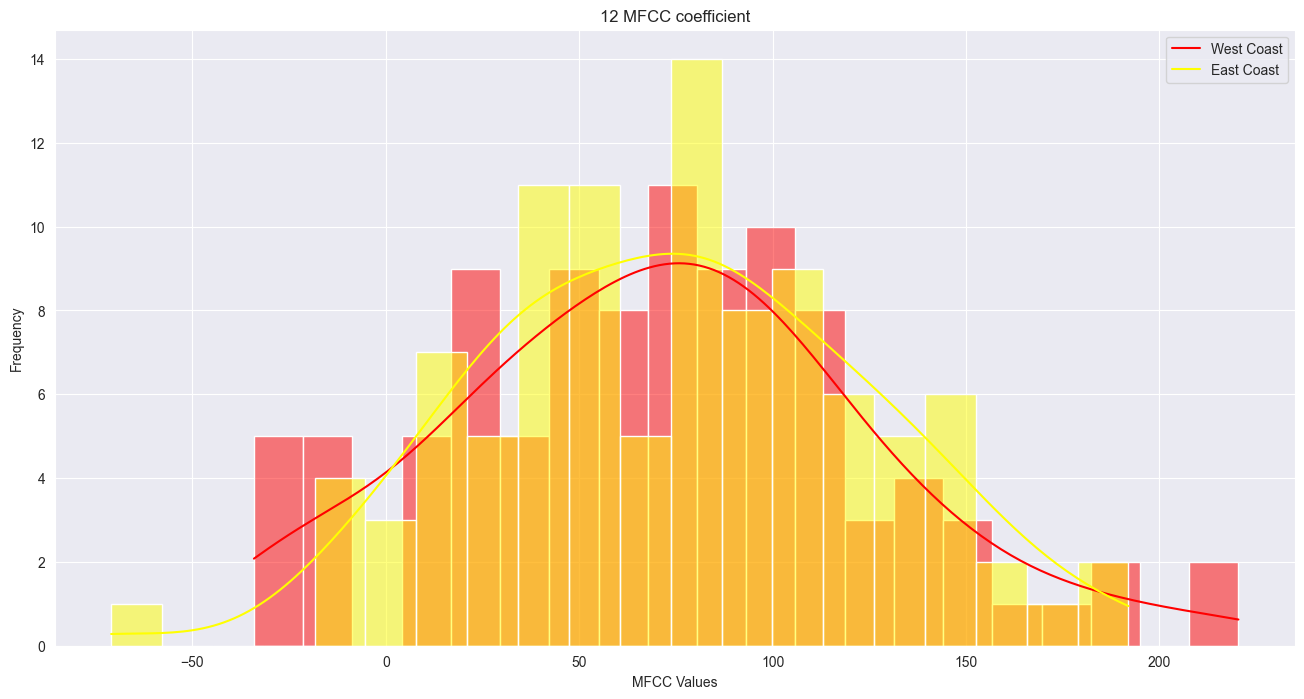

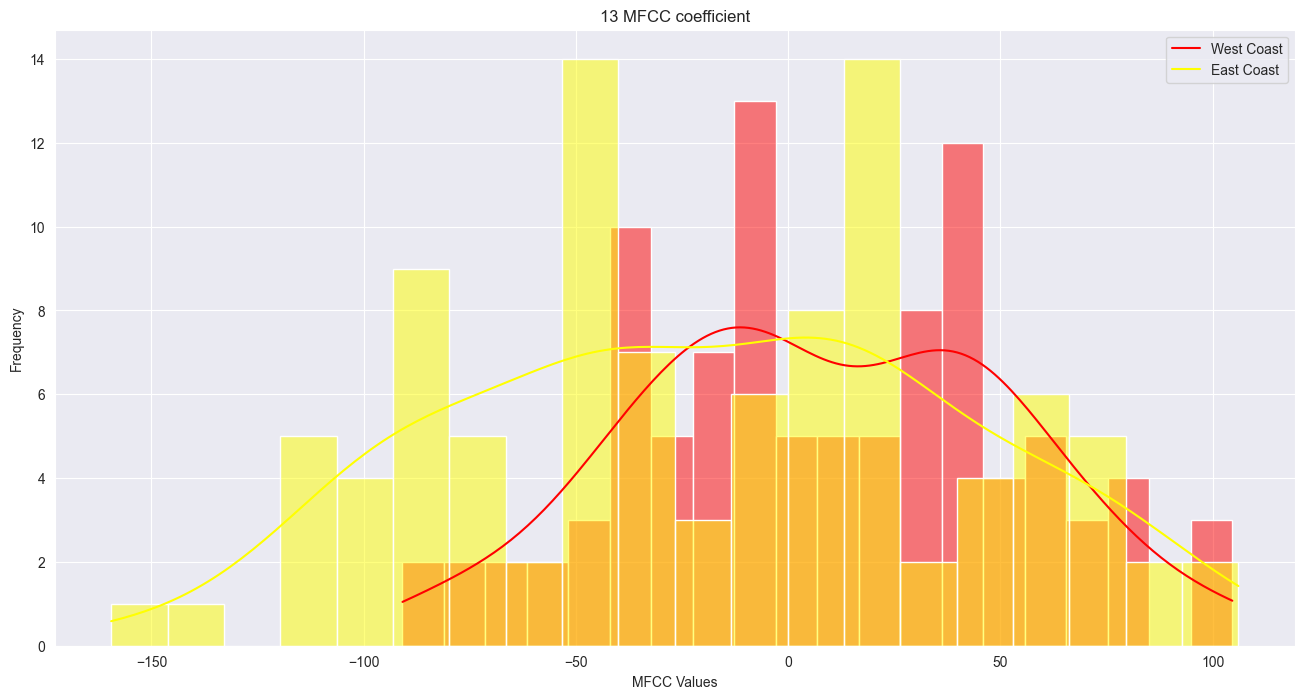

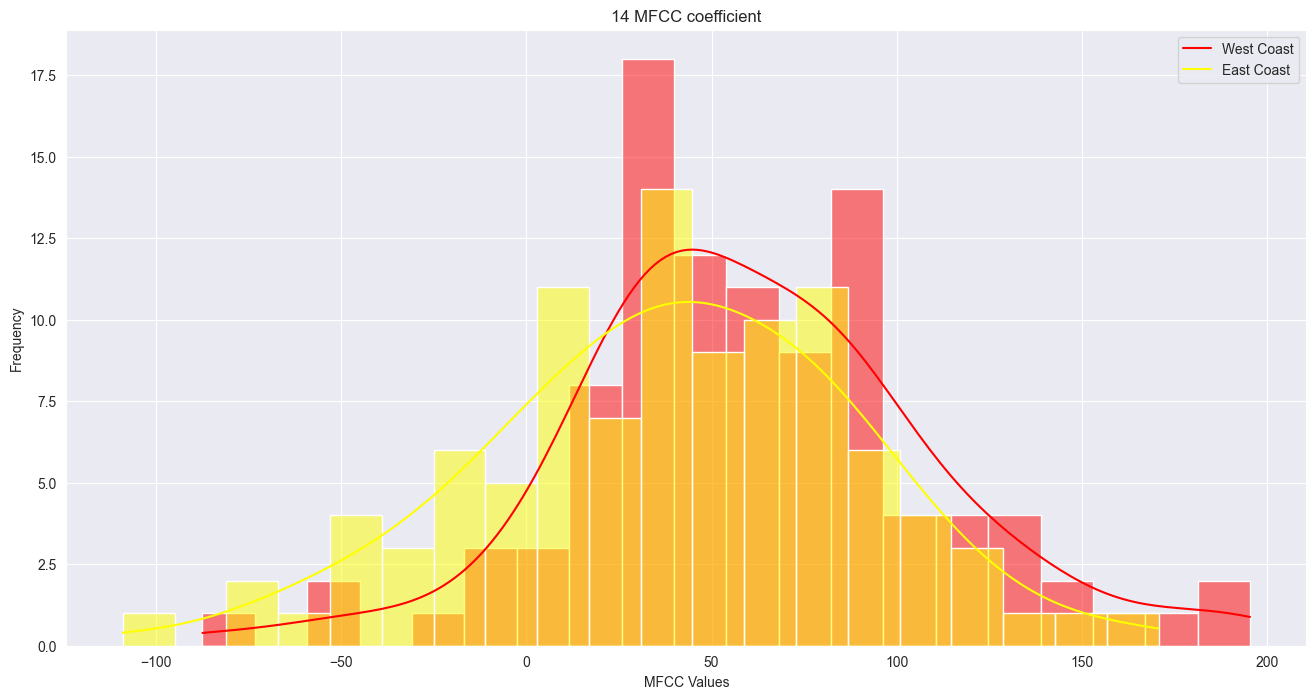

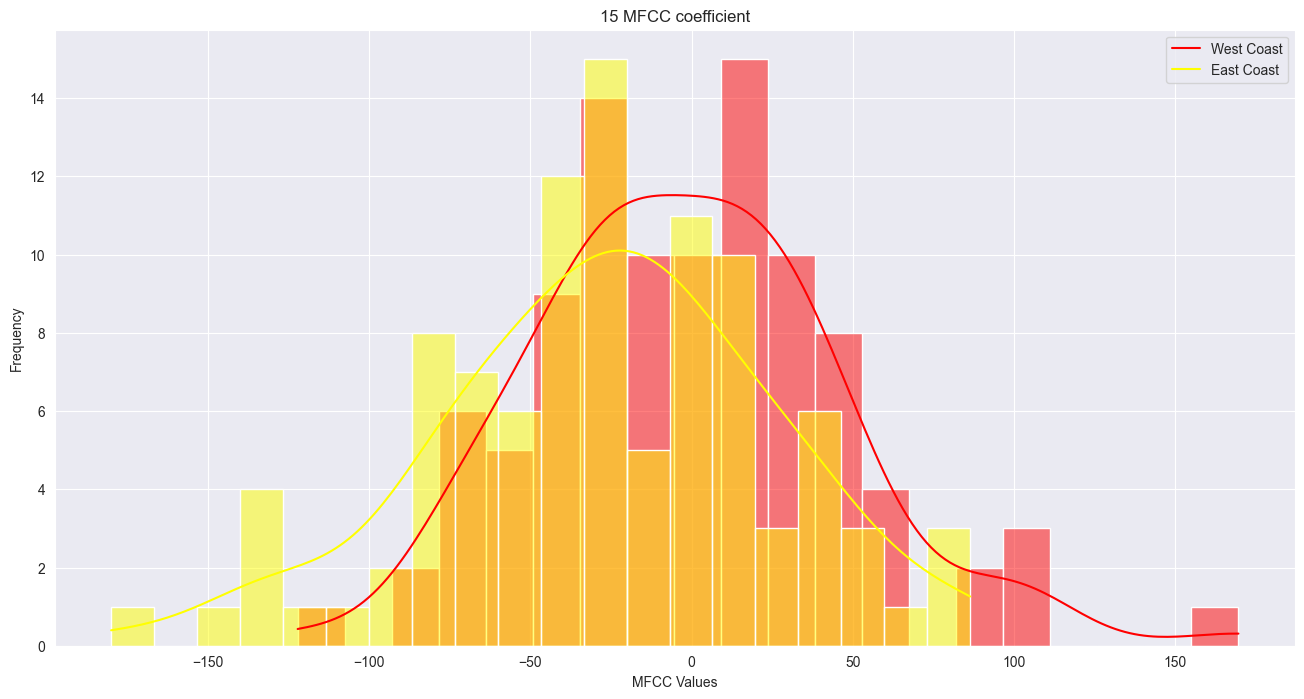

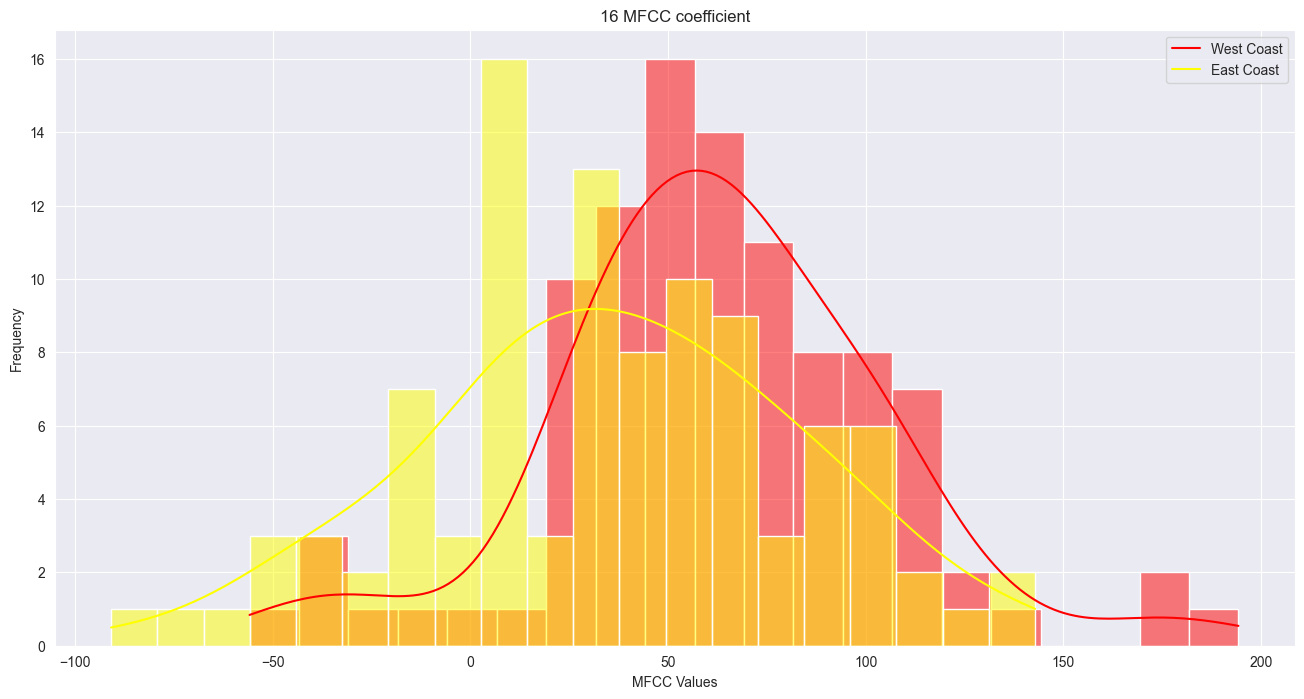

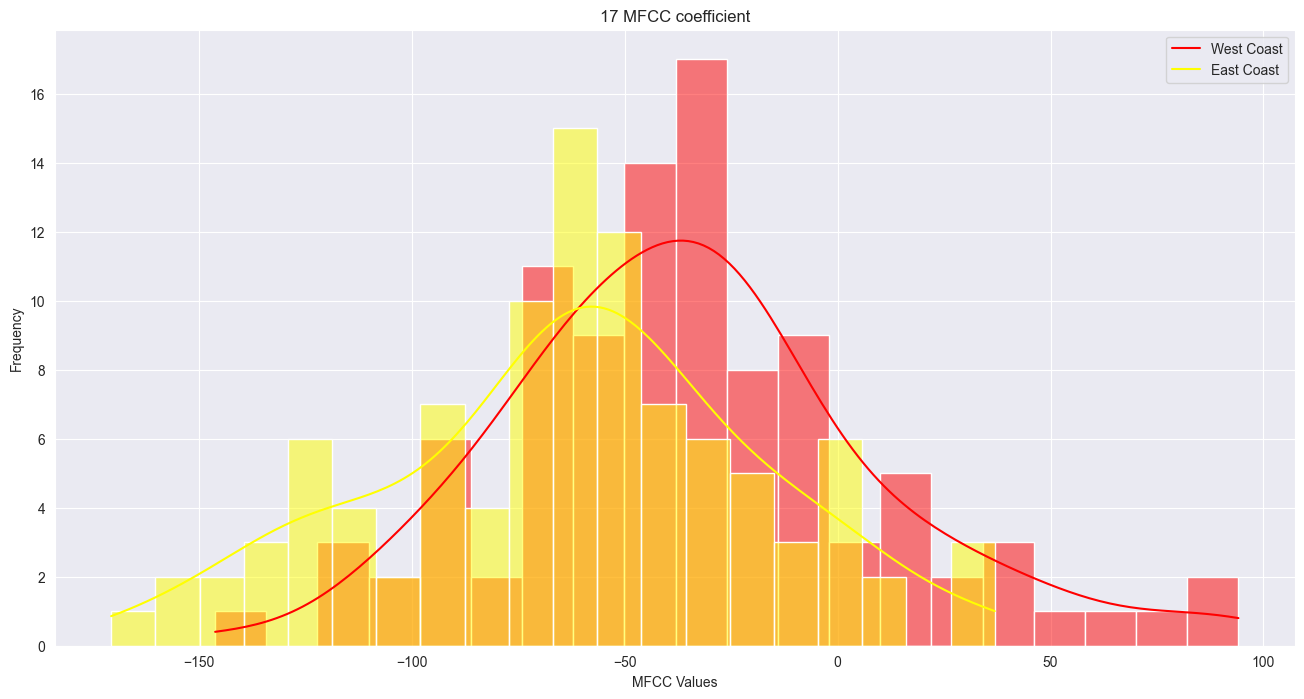

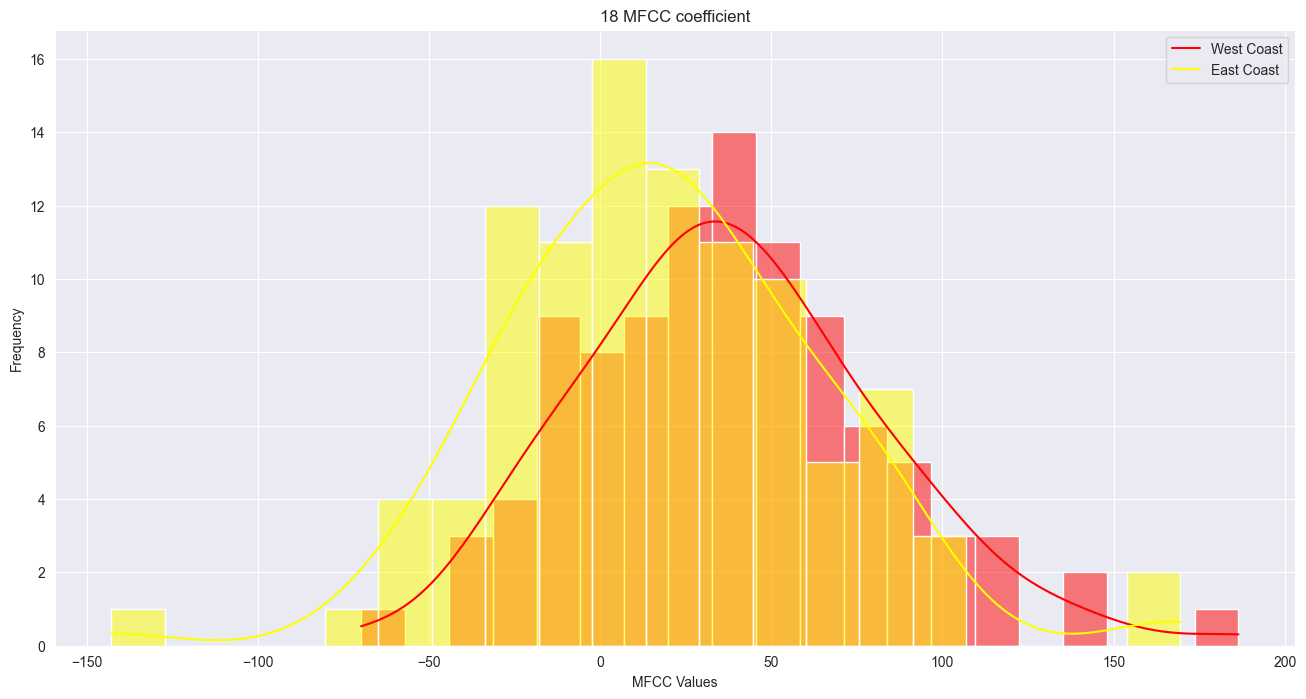

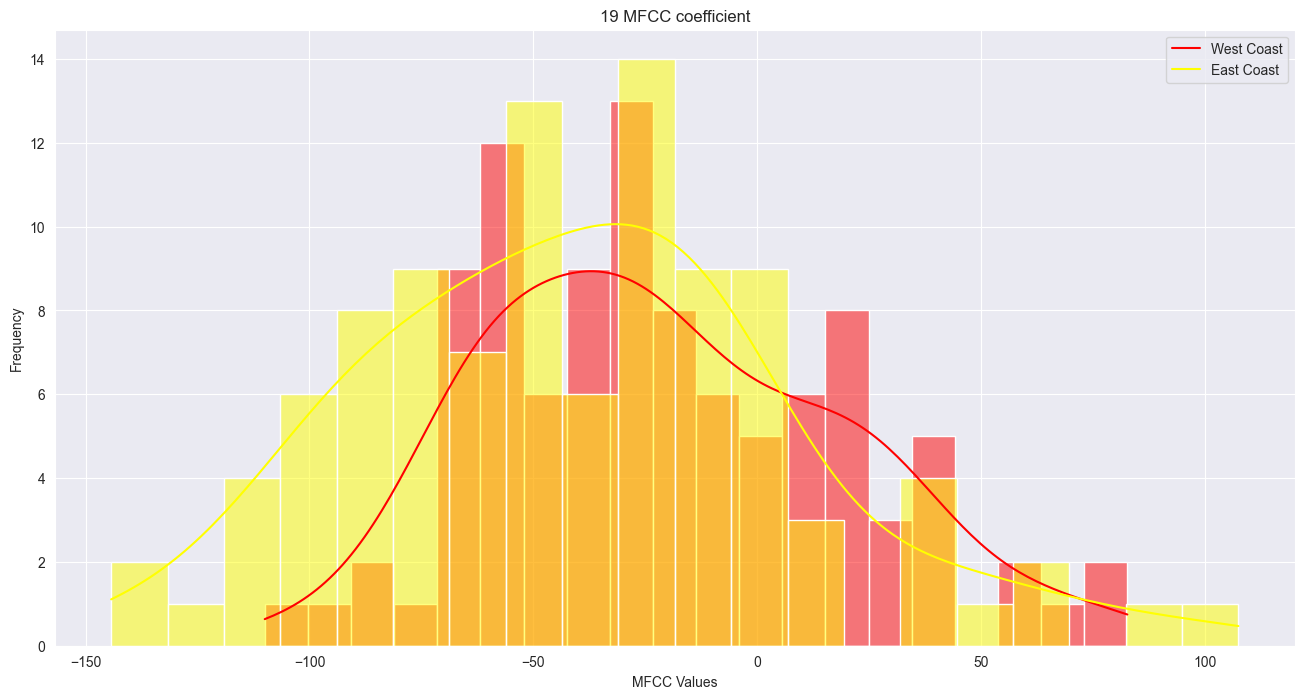

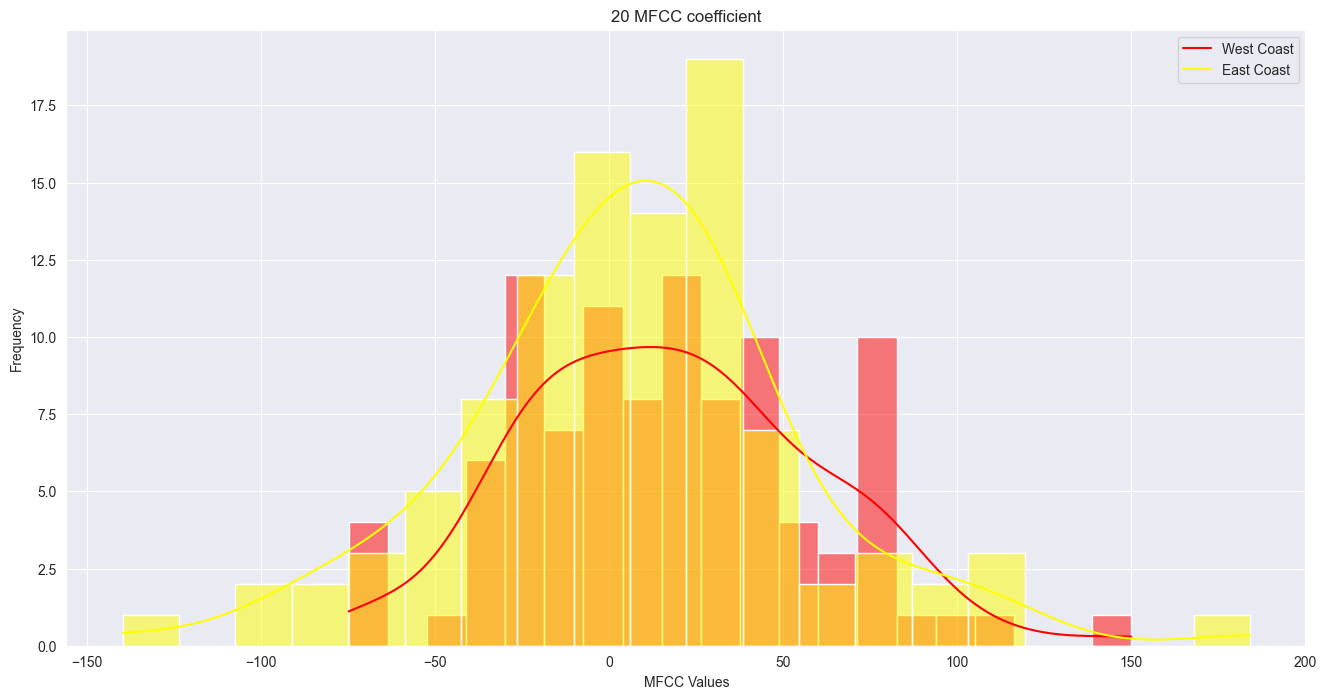

In [29]:
no_mfcc_component = east_coast_mfccs.shape[1]

for mfcc_coefficient in range(no_mfcc_component):
    plot_mfcc_distributions(west_coast_mfccs[:, mfcc_coefficient], east_coast_mfccs[:, mfcc_coefficient], ['West Coast', 'East Coast'], f'{mfcc_coefficient + 1} MFCC coefficient')